# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 3

Group Members:
- Wisa Ahmaduta Dinutama (18223003)
- Persada Ramiiza Abyudaya (18223033)
- Inggried Amelia Deswanty (18223935)
- Wijaksara Aptaluhung (18223088)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', 50)

## Import Dataset

In [5]:
df = pd.read_csv("https://drive.google.com/uc?id=1Z2uDa85ypE11VaGMh9hi2VKRk-bWsUP4")
df

,ID,transaction_id,user_id,age,gender,country,device_type,device_os,merchant_category,transaction_amount,transaction_type,time_of_day,day_of_week,transaction_duration,num_prev_transactions,avg_transaction_amount,std_transaction_amount,transactions_last_24h,transactions_last_1h,failed_login_attempts,ip_risk_score,device_trust_score,account_age_days,has_chargeback_history,shared_ip_users,shared_device_users,merchant_risk,country_risk,distance_from_home,is_new_country,is_fraud
0,0,T0065716,15307,35,M,UK,mobile,Android,clothing,17.70,purchase,18,1,3.04,34,91.01,56.68,0,0,1,0.464,0.793,1056,0,1,1,0.10,0.04,9.66,0,1
1,1,T0027857,1226,54,F,IN,mobile,Android,restaurants,NaN,purchase,7,3,0.33,28,NaN,50.11,1,0,0,0.997,NaN,1867,0,1,1,0.12,0.10,12.05,0,1
2,2,T0055953,16072,35,M,US,desktop,iOS,restaurants,5.20,purchase,15,5,7.85,31,111.05,20.79,3,0,0,0.940,0.281,1726,1,2,2,0.12,0.05,181.28,0,0
3,3,T0083660,725,23,F,US,mobile,Android,electronics,180.70,purchase,18,3,4.71,32,27.88,73.32,3,0,0,0.166,0.061,30,1,1,1,0.30,0.05,33.26,0,0
4,4,T0017674,7367,32,M,UK,mobile,Android,gas,35.45,purchase,8,3,1.56,21,81.34,73.28,0,0,0,0.870,0.592,1386,0,3,1,0.05,0.04,174.83,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,T0046220,14692,72,M,IN,mobile,Android,electronics,7.67,purchase,13,0,4.74,29,56.14,31.55,2,1,0,0.411,0.888,1593,0,0,0,0.30,0.10,321.83,0,0
99996,99996,T0098804,9462,37,F,UK,mobile,Android,restaurants,47.95,topup,11,0,4.79,41,99.43,39.07,2,0,0,0.589,0.306,673,0,6,2,0.12,0.04,48.53,0,1
99997,99997,T0048045,13581,19,F,US,mobile,Android,services,44.29,purchase,19,5,0.11,47,83.67,6.28,2,0,0,0.044,0.735,1511,0,1,0,0.08,0.05,163.73,0,0
99998,99998,T0070053,6704,34,M,IN,mobile,Windows,electronics,NaN,purchase,6,0,2.29,40,NaN,48.84,1,0,0,0.936,NaN,906,0,1,2,0.30,0.10,67.30,0,0


In [6]:
df['merchant_risk'].max()
df['transactions_last_1h'].max()

np.int64(15)

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

Step 1: Data Understanding

In [7]:
df.shape
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      100000 non-null  int64  
 1   transaction_id          100000 non-null  object 
 2   user_id                 100000 non-null  int64  
 3   age                     100000 non-null  int64  
 4   gender                  100000 non-null  object 
 5   country                 100000 non-null  object 
 6   device_type             100000 non-null  object 
 7   device_os               100000 non-null  object 
 8   merchant_category       100000 non-null  object 
 9   transaction_amount      97581 non-null   float64
 10  transaction_type        100000 non-null  object 
 11  time_of_day             100000 non-null  int64  
 12  day_of_week             100000 non-null  int64  
 13  transaction_duration    100000 non-null  float64
 14  num_prev_transactions

In [8]:
df.head(20)

,ID,transaction_id,user_id,age,gender,country,device_type,device_os,merchant_category,transaction_amount,transaction_type,time_of_day,day_of_week,transaction_duration,num_prev_transactions,avg_transaction_amount,std_transaction_amount,transactions_last_24h,transactions_last_1h,failed_login_attempts,ip_risk_score,device_trust_score,account_age_days,has_chargeback_history,shared_ip_users,shared_device_users,merchant_risk,country_risk,distance_from_home,is_new_country,is_fraud
0,0,T0065716,15307,35,M,UK,mobile,Android,clothing,17.700000,purchase,18,1,3.04,34,91.01,56.68,0,0,1,0.464,0.793,1056,0,1,1,0.10,0.04,9.660000,0,1
1,1,T0027857,1226,54,F,IN,mobile,Android,restaurants,NaN,purchase,7,3,0.33,28,NaN,50.11,1,0,0,0.997,NaN,1867,0,1,1,0.12,0.10,12.050000,0,1
2,2,T0055953,16072,35,M,US,desktop,iOS,restaurants,5.200000,purchase,15,5,7.85,31,111.05,20.79,3,0,0,0.940,0.281,1726,1,2,2,0.12,0.05,181.280000,0,0
3,3,T0083660,725,23,F,US,mobile,Android,electronics,180.700000,purchase,18,3,4.71,32,27.88,73.32,3,0,0,0.166,0.061,30,1,1,1,0.30,0.05,33.260000,0,0
4,4,T0017674,7367,32,M,UK,mobile,Android,gas,35.450000,purchase,8,3,1.56,21,81.34,73.28,0,0,0,0.870,0.592,1386,0,3,1,0.05,0.04,174.830000,0,0
5,5,T0098705,25100,60,M,ID,mobile,Android,electronics,32.570000,purchase,7,0,3.74,33,61.45,26.87,1,0,1,0.717,0.971,1950,0,4,1,0.30,0.12,72.280000,0,0
6,6,T0004247,10914,66,F,IN,mobile,Android,gas,2.580000,purchase,9,4,4.25,28,103.94,73.73,1,0,1,0.591,0.231,2892,0,1,1,0.05,0.10,31.190000,0,0
7,7,T0015406,15286,57,F,US,desktop,Android,gas,57.610000,purchase,14,6,1.10,28,21.86,5.78,0,1,0,0.681,0.424,2977,0,4,1,0.05,0.05,11.160000,0,0
8,8,T0084982,16868,36,M,IN,mobile,iOS,restaurants,7.520000,purchase,18,5,0.47,29,79.46,57.75,0,0,0,0.857,0.580,2760,0,3,2,0.12,0.10,0.350000,0,1
9,9,T0037909,8333,64,M,IN,mobile,Windows,services,91.020000,purchase,7,2,8.08,25,71.07,45.65,1,0,0,0.455,0.743,1438,0,3,1,0.08,0.10,191.100000,0,0


In [57]:
df.dtypes

ID                          int64
transaction_id             object
user_id                     int64
age                         int64
gender                     object
country                    object
device_type                object
device_os                  object
merchant_category          object
transaction_amount        float64
transaction_type           object
time_of_day                 int64
day_of_week                 int64
transaction_duration      float64
num_prev_transactions       int64
avg_transaction_amount    float64
std_transaction_amount    float64
transactions_last_24h       int64
transactions_last_1h        int64
failed_login_attempts       int64
ip_risk_score             float64
device_trust_score        float64
account_age_days            int64
has_chargeback_history      int64
shared_ip_users             int64
shared_device_users         int64
merchant_risk             float64
country_risk              float64
distance_from_home        float64
is_new_country

In [9]:
df.describe()
print("\nDistribusi Target:")
print(df['is_fraud'].value_counts(normalize=True))


Distribusi Target:
is_fraud
0    0.85872
1    0.14128
Name: proportion, dtype: float64


# 1. Split Training Set, Validation Set, Testing Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [10]:
train_set_ori = df.copy()
train_set, val_set = train_test_split(df, test_size=0.3, stratify=df["is_fraud"], random_state=42)
print("Train set:")
train_set


Train set:


,ID,transaction_id,user_id,age,gender,country,device_type,device_os,merchant_category,transaction_amount,transaction_type,time_of_day,day_of_week,transaction_duration,num_prev_transactions,avg_transaction_amount,std_transaction_amount,transactions_last_24h,transactions_last_1h,failed_login_attempts,ip_risk_score,device_trust_score,account_age_days,has_chargeback_history,shared_ip_users,shared_device_users,merchant_risk,country_risk,distance_from_home,is_new_country,is_fraud
9790,9790,T0038287,1990,57,F,IN,mobile,iOS,restaurants,49.47,purchase,18,1,6.49,30,106.46,20.86,3,0,0,0.501,0.608,28,1,2,1,0.12,0.10,41.63,0,1
97884,97884,T0062819,24069,78,F,US,mobile,Android,electronics,131.72,purchase,18,4,4.64,34,92.20,57.65,1,0,1,0.088,0.153,2045,0,1,3,0.30,0.05,36.31,0,0
85928,85928,T0003193,19922,52,M,US,mobile,MacOS,restaurants,265.78,purchase,17,1,0.85,28,73.47,62.78,0,0,1,0.295,0.238,2445,0,2,2,0.12,0.05,138.77,0,0
21218,21218,T0076870,12646,74,M,CA,mobile,Linux,electronics,11.38,purchase,15,0,11.79,27,95.78,24.95,0,0,0,0.604,0.225,1877,0,2,1,0.30,0.03,2.21,0,0
29289,29289,T0094763,2258,64,M,IN,mobile,Windows,electronics,91.45,topup,21,2,6.34,38,31.10,51.26,0,0,2,0.165,0.203,198,0,2,1,0.30,0.10,164.04,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41877,41877,T0039012,14606,22,M,IN,mobile,Windows,electronics,NaN,purchase,9,0,7.76,24,NaN,12.53,2,0,0,0.193,NaN,302,0,1,2,0.30,0.10,28.78,0,0
80297,80297,T0048756,2391,60,F,IN,mobile,Android,services,260.33,purchase,16,3,3.04,21,102.49,18.88,1,1,0,0.369,0.273,2758,0,3,0,0.08,0.10,47.00,0,0
11318,11318,T0055860,1124,60,F,US,desktop,Windows,groceries,52.73,purchase,5,5,0.03,25,72.79,38.20,3,0,0,0.416,0.565,1242,0,2,2,0.05,0.05,81.56,0,0
83391,83391,T0011784,27945,51,M,CA,mobile,Android,gas,26.40,withdrawal,19,6,9.90,26,70.03,38.51,2,0,0,0.852,0.484,46,0,1,2,0.05,0.03,18.94,0,0


In [11]:
val_set

,ID,transaction_id,user_id,age,gender,country,device_type,device_os,merchant_category,transaction_amount,transaction_type,time_of_day,day_of_week,transaction_duration,num_prev_transactions,avg_transaction_amount,std_transaction_amount,transactions_last_24h,transactions_last_1h,failed_login_attempts,ip_risk_score,device_trust_score,account_age_days,has_chargeback_history,shared_ip_users,shared_device_users,merchant_risk,country_risk,distance_from_home,is_new_country,is_fraud
88420,88420,T0023819,17581,41,F,ID,tablet,Android,restaurants,84.77,withdrawal,21,5,2.51,27,90.30,29.57,1,0,1,0.317,0.247,1564,0,3,3,0.12,0.12,7.53,0,0
41539,41539,T0034210,9213,58,F,IN,mobile,Linux,gas,17.27,purchase,7,5,2.10,28,50.12,49.86,1,0,0,0.283,0.327,219,1,2,1,0.05,0.10,60.37,0,0
2512,2512,T0019144,9109,26,F,CA,mobile,Android,restaurants,19.34,purchase,13,0,0.44,30,63.63,53.16,4,0,0,0.829,0.623,195,0,3,0,0.12,0.03,59.99,0,0
21578,21578,T0036731,28223,42,F,IN,mobile,iOS,electronics,91.64,transfer,8,1,1.05,29,87.80,13.73,0,0,1,0.852,0.851,1469,0,2,1,0.30,0.10,77.23,0,0
21022,21022,T0073455,27046,54,M,US,mobile,Android,clothing,17.90,purchase,8,3,0.33,21,115.40,69.23,1,0,1,0.038,0.430,2714,0,1,1,0.10,0.05,7.57,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91568,91568,T0013968,17435,76,M,IN,mobile,Android,services,39.75,topup,19,4,1.16,36,82.11,16.57,1,0,0,0.461,0.206,1130,0,2,0,0.08,0.10,0.83,0,0
79484,79484,T0047703,14366,48,M,FR,mobile,Windows,electronics,6.76,withdrawal,5,1,1.10,31,64.31,33.08,2,0,1,0.996,0.821,2106,0,2,1,0.30,0.04,35.33,0,0
80316,80316,T0085834,6902,67,M,CA,desktop,Windows,restaurants,30.54,purchase,2,3,2.88,24,65.98,24.01,2,0,0,0.508,0.504,410,0,2,1,0.12,0.03,126.38,0,0
42668,42668,T0067912,14221,48,F,US,mobile,Windows,restaurants,47.71,transfer,7,4,0.27,24,64.48,16.78,2,0,0,0.464,0.775,2008,0,4,3,0.12,0.05,74.78,0,0


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [14]:
total_null_count = df.isnull().sum().sum()
print("\nTotal null count in DataFrame:")
print(total_null_count)


Total null count in DataFrame:
7257


In [13]:
num_cols = train_set.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = train_set.select_dtypes(include=['object']).columns.tolist()

if 'is_fraud' in num_cols:
    num_cols.remove('is_fraud')

for col in num_cols:
  median_val = train_set[col].median()

  train_set[col] = train_set[col].fillna(median_val)
  val_set[col] = val_set[col].fillna(median_val)

for col in cat_cols:
  mode_val = train_set[col].mode()[0]

  train_set[col] = train_set[col].fillna(mode_val)
  val_set[col] = val_set[col].fillna(mode_val)

print("Sisa null di Train Set setelah imputasi:")
print(train_set.isnull().sum().sum())
print("Sisa null di Val Set setelah imputasi:")
print(val_set.isnull().sum().sum())

Sisa null di Train Set setelah imputasi:
0
Sisa null di Val Set setelah imputasi:
0


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

Outlier handling (Capping 99th percentile) selesai.


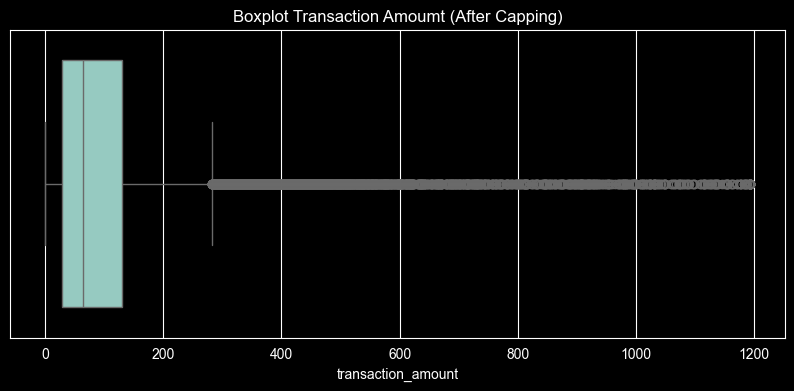

Outlier handling (Capping 99th percentile) selesai.


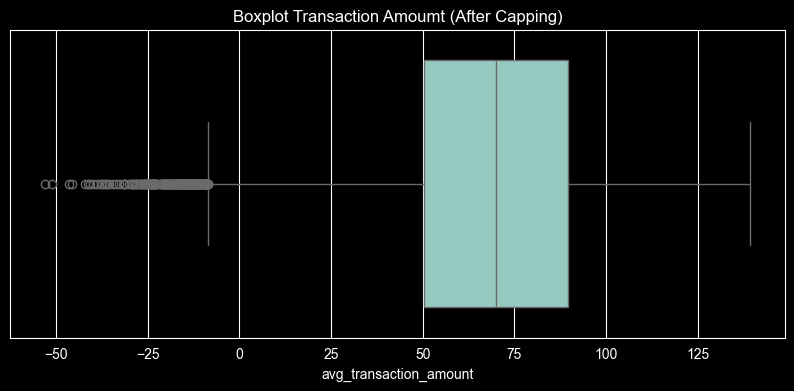

In [15]:
cols_to_cap = ['transaction_amount', 'avg_transaction_amount']

for col in cols_to_cap:
  upper_limit = train_set[col].quantile(0.99)

  train_set[col] = train_set[col].clip(upper=upper_limit)
  val_set[col] = val_set[col].clip(upper=upper_limit)

  print("Outlier handling (Capping 99th percentile) selesai.")

  plt.figure(figsize=(10, 4))
  sns.boxplot(x=train_set[col])
  plt.title('Boxplot Transaction Amoumt (After Capping)')
  plt.show()

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [16]:
print(f"Jumlah baris train_set sebelum: {len(train_set)}")

train_set = train_set.drop_duplicates()

print(f"Jumlah baris train_set setelah: {len(train_set)}")

Jumlah baris train_set sebelum: 70000
Jumlah baris train_set setelah: 70000


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [17]:
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass

  def fit(self, x, y=None):
    return self

  def transform(self, x, y=None):
    x_eng = x.copy()

    bins = [0, 18, 60, 120]
    labels = ['Child', 'Adult', 'Senior']
    x_eng['age_group'] = pd.cut(x_eng['age'], bins=bins, labels=labels, right=False)
    x_eng['age_group'] = x_eng['age_group'].astype(str)

    if 'avg_transaction_amount' in x_eng.columns and 'transaction_amount' in x_eng.columns:
      x_eng['amount_ratio'] = x_eng['transaction_amount'] / x_eng['avg_transaction_amount'] + 1e-9

    cols_to_drop = ['ID', 'transaction_id', 'user_id', 'age']
    x_eng = x_eng.drop(columns=[c for c in cols_to_drop if c in x_eng.columns], errors='ignore')

    return x_eng

In [18]:
fe_transformer = FeatureEngineeringTransformer()

train_set_eng = fe_transformer.fit_transform(train_set)
val_set_eng = fe_transformer.transform(val_set)

print("Feature Engineering Selesai.")
print("Fitur baru 'age_group' dan 'amount_ratio' telah ditambahkan.")
print("Contoh 5 baris pertama:")
display(train_set_eng[['age_group', 'amount_ratio']].head())

Feature Engineering Selesai.
Fitur baru 'age_group' dan 'amount_ratio' telah ditambahkan.
Contoh 5 baris pertama:


,age_group,amount_ratio
9790,Adult,0.464682
97884,Senior,1.428633
85928,Adult,3.617531
21218,Senior,0.118814
29289,Senior,2.940514


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [41]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [42]:
# Write your code here

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [43]:
# Write your code here

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [44]:
# Write your code here

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [45]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [46]:
# Write your code here

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [47]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [48]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [49]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. DTL

In [50]:
# Type your code here

## B. Logistic Regression

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

class LogisticRegressionScratch:
    """
    Logistic Regression implementation from scratch using Gradient Descent.
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization=None, lambda_reg=0.01):
        """
        Initialize Logistic Regression model.
        
        Parameters:
        -----------
        learning_rate : float
            Learning rate for gradient descent (default: 0.01)
        n_iterations : int
            Number of iterations for gradient descent (default: 1000)
        regularization : str or None
            Type of regularization ('l1', 'l2', or None)
        lambda_reg : float
            Regularization strength (default: 0.01)
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.weights = None
        self.bias = None
        self.losses = []
    
    def _sigmoid(self, z):
        """
        Sigmoid activation function.
        σ(z) = 1 / (1 + e^(-z))
        """
        # Clip to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _compute_loss(self, y_true, y_pred):
        """
        Compute Binary Cross-Entropy Loss.
        L = -1/n * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
        """
        n_samples = len(y_true)
        # Clip predictions to prevent log(0)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        
        loss = -1/n_samples * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        # Add regularization term
        if self.regularization == 'l2':
            loss += (self.lambda_reg / (2 * n_samples)) * np.sum(self.weights ** 2)
        elif self.regularization == 'l1':
            loss += (self.lambda_reg / n_samples) * np.sum(np.abs(self.weights))
        
        return loss
    
    def fit(self, X, y, verbose=True):
        """
        Train the Logistic Regression model using Gradient Descent.
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data
        y : array-like of shape (n_samples,)
            Target values
        verbose : bool
            Print training progress
        """
        X = np.array(X)
        y = np.array(y).reshape(-1)
        
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.losses = []
        
        # Gradient Descent
        for i in range(self.n_iterations):
            # Forward pass: linear combination
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid
            y_pred = self._sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Add regularization gradients
            if self.regularization == 'l2':
                dw += (self.lambda_reg / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.lambda_reg / n_samples) * np.sign(self.weights)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute and store loss
            loss = self._compute_loss(y, y_pred)
            self.losses.append(loss)
            
            # Print progress
            if verbose and (i + 1) % 100 == 0:
                print(f"Iteration {i+1}/{self.n_iterations}, Loss: {loss:.6f}")
        
        return self
    
    def predict_proba(self, X):
        """
        Predict probability for each sample.
        
        Returns:
        --------
        array of shape (n_samples,) with probabilities
        """
        X = np.array(X)
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """
        Predict class labels for samples in X.
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
        threshold : float
            Decision threshold (default: 0.5)
        
        Returns:
        --------
        array of shape (n_samples,) with predicted class labels
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def score(self, X, y):
        """
        Calculate accuracy score.
        """
        predictions = self.predict(X)
        return accuracy_score(y, predictions)
    
    def plot_loss(self):
        """
        Plot the training loss over iterations.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.losses)
        plt.title('Training Loss over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Binary Cross-Entropy Loss')
        plt.grid(True)
        plt.show()


# ========================
# PREPROCESSING DATA
# ========================

# Prepare training and validation data
X_train = train_set_eng.drop(columns=['is_fraud'])
y_train = train_set_eng['is_fraud']
X_val = val_set_eng.drop(columns=['is_fraud'])
y_val = val_set_eng['is_fraud']

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Get categorical columns
cat_cols_lr = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols_lr = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Label encode categorical columns
label_encoders = {}
X_train_encoded = X_train.copy()
X_val_encoded = X_val.copy()

for col in cat_cols_lr:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col].astype(str))
    X_val_encoded[col] = le.transform(X_val_encoded[col].astype(str))
    label_encoders[col] = le

# Scale numerical features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

print("Data preprocessing selesai!")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Validation set shape: {X_val_scaled.shape}")


# ========================
# TRAINING MODEL
# ========================

print("\n" + "="*50)
print("Training Logistic Regression from Scratch")
print("="*50)

# Initialize and train the model
lr_model = LogisticRegressionScratch(
    learning_rate=0.1,
    n_iterations=1000,
    regularization='l2',
    lambda_reg=0.01
)

lr_model.fit(X_train_scaled, y_train, verbose=True)

# Plot training loss
lr_model.plot_loss()


# ========================
# EVALUATION
# ========================

print("\n" + "="*50)
print("Model Evaluation")
print("="*50)

# Predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_val_pred = lr_model.predict(X_val_scaled)
y_val_proba = lr_model.predict_proba(X_val_scaled)

# Training metrics
print("\n--- Training Set Metrics ---")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred):.4f}")

# Validation metrics
print("\n--- Validation Set Metrics ---")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred):.4f}")

# Classification Report
print("\n--- Classification Report (Validation Set) ---")
print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))

# Confusion Matrix
print("\n--- Confusion Matrix (Validation Set) ---")
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Logistic Regression (From Scratch)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print model parameters info
print("\n--- Model Information ---")
print(f"Number of features: {len(lr_model.weights)}")
print(f"Final Loss: {lr_model.losses[-1]:.6f}")
print(f"Learning Rate: {lr_model.learning_rate}")
print(f"Regularization: {lr_model.regularization} (λ={lr_model.lambda_reg})")

## C. KNN

In [52]:
# Type your code here

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [53]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [54]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`